## Install necessary libraries

In [2]:
!pip install pandas
!pip install pyarrow
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 36.5 MB/s eta 0:00:00:00:01
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 60.7 MB/s eta 0:00:00:00:01
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd

## Emory ICU Files

There are different data files for Emory ICU datasets (all are stored as parquet files which are optimized for performance and storage efficiency.) The files that we have are as follows-

1. admissions.parquet
2. chartevents.parquet
3. d_hcpcs.parquet
4. d_icd_diagnoses.parquet
5. d_items.parquet
6. d_labitems.parquet
7. diagnoses_icd.parquet
8. emar.parquet
9. emar_detail.parquet
10. hcpcsevents.parquet
11. icustays.parquet
12. labevents.parquet
13. microbiologyevents.parquet
14. patients.parquet
15. procedureevents.parquet
16. services.parquet
17. transfers.parquet

We will start with exploring the data files.

## Admissions

In [25]:
df = pd.read_parquet('../../fsx/embed/emory-mimic-icu/tables/admissions.parquet')

# Display the DataFrame
df

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000100,58594204243,2019-06-26 13:20:00,2019-07-05 12:47:00,NaT,None,None,PHYSIC OFC/CLINIC,HOME SELF CARE,MEDICARE A,None,None,African American or Black,NaT,NaT,0
1,10000562,60707883031,2016-06-02 09:24:00,2016-06-04 15:11:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MEDICAID,None,None,African American or Black,NaT,NaT,0
2,10000671,67252991505,2019-05-14 20:20:00,2019-05-15 13:09:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,SELF PAY,None,None,African American or Black,NaT,NaT,0
3,10000683,29770490036,2015-05-12 18:28:00,2015-05-17 15:55:00,NaT,None,None,TRANSFER FROM HOSP,HOME SELF CARE,MANAGED CARE,None,None,Caucasian or White,NaT,NaT,0
4,10000683,21514546148,2015-05-28 14:04:00,2015-06-03 19:03:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,None,None,Caucasian or White,NaT,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972842,99999731,37382428249,2009-11-24 12:50:00,2009-11-25 18:50:00,NaT,None,None,Not Recorded,HOME SELF CARE,MANAGED CARE,None,None,African American or Black,NaT,NaT,0
972843,99999731,58311570862,2010-06-28 15:23:00,2010-06-29 19:42:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,None,None,African American or Black,NaT,NaT,0
972844,99999731,55258667078,2010-11-20 13:01:00,2010-11-21 18:45:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,None,None,African American or Black,NaT,NaT,0
972845,99999856,39743800534,2019-09-21 08:20:00,2019-09-23 15:45:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE,None,None,Caucasian or White,NaT,NaT,0


We want to see how many patients were admitted according to admission file

In [26]:
df["subject_id"].unique()

array([10000100, 10000562, 10000671, ..., 99999731, 99999856, 99999997],
      dtype=int32)

In [27]:
df["subject_id"].nunique()
#This shows how manu different subject IDs are there in the file

492109

So there are 492109 number of unique subject_ids.

Let's see the racial distribution of the patients

In [28]:
df["race"].value_counts()

race
Caucasian or White                           463114
African American  or Black                   435795
Unknown, Unavailable or Unreported            35982
Asian                                         25988
Multiple                                       4572
American Indian or Alaskan Native              2338
Native Hawaiian or Other Pacific Islander      1708
Not Recorded                                   1360
Hispanic                                       1342
Patient Declines                                597
1                                                22
2                                                18
3                                                 3
Alaskan Native                                    3
Asian American                                    2
African Am.                                       2
CD:1594                                           1
Name: count, dtype: int64

## To plot the distribution, we need more python libraries

In [29]:
import matplotlib.pyplot as plt

## We want to see the bar chart of the distribution of the race

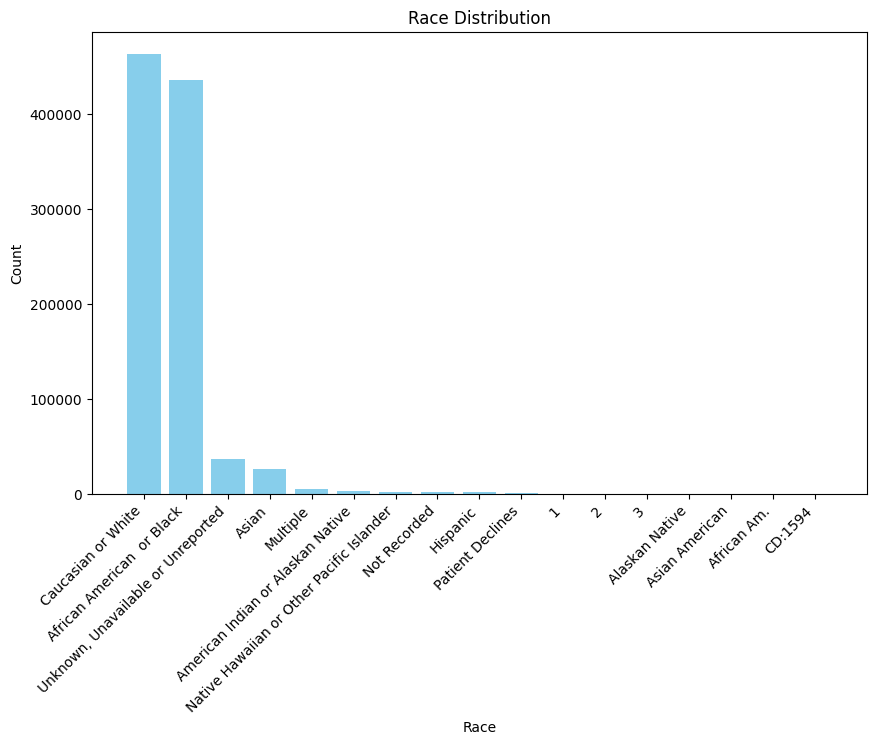

In [30]:
# Get the value counts for the 'race' column
race_counts = df["race"].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Optional: to make the chart larger
plt.bar(race_counts.index, race_counts.values, color='skyblue')

# Adding title and labels
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

#### There are too many classes in the race column, thus we will now combine few classes into one. Let's preprocess that..

In [31]:
# Define the mapping for the replacements
mapping = {
    '1': 'Others',
    '2': 'Others',
    '3': 'Others',
    'Alaskan Native': 'Others',
    'African Am.': 'African American  or Black',
    'Not Recorded': 'Unknown, Unavailable or Unreported',
    'CD:1594': 'Others',
    'Asian American': 'Multiple',
    'Patient Declines': 'Unknown, Unavailable or Unreported',
    'American Indian or Alaskan Native': 'Others',
    'Native Hawaiian or Other Pacific Islander': 'Others',
    'Hispanic': 'Others'
}

# Replace the values in the "race" column
df["race"] = df["race"].replace(mapping)

# Now you can check the updated value counts
race_counts = df["race"].value_counts()
race_counts

race
Caucasian or White                    463114
African American  or Black            435797
Unknown, Unavailable or Unreported     37939
Asian                                  25988
Others                                  5435
Multiple                                4574
Name: count, dtype: int64

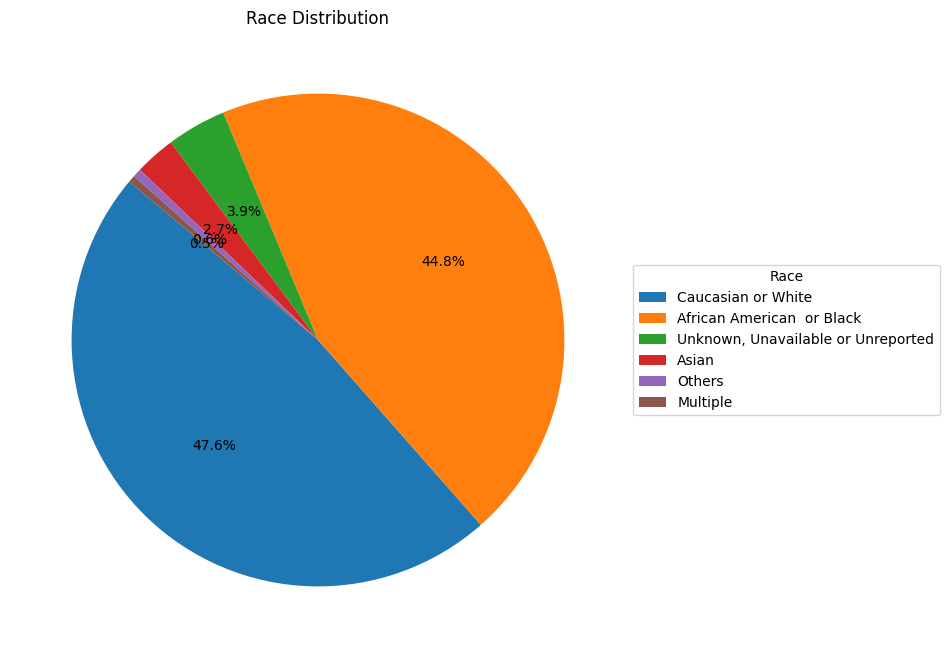

In [32]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Optional: to make the chart a bit larger
wedges, texts, autotexts = plt.pie(race_counts, autopct='%1.1f%%', startangle=140)

# Adding title
plt.title('Race Distribution')

# Adding the legend outside the pie chart
plt.legend(wedges, race_counts.index, title="Race", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Display the chart
plt.show()

## Exploring more files

In [33]:
df_icustays = pd.read_parquet('../../fsx/embed/emory-mimic-icu/tables/icustays.parquet')
df_icustays

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los
0,10000683,29770490036,1,5E ICU EUH,5E ICU EUH,2015-05-12 18:29:30,2015-05-13 16:51:55,0.932234
1,10000683,29770490036,2,5E ICU EUH,5E ICU EUH,2015-05-13 17:16:17,2015-05-13 22:14:51,0.207338
2,10000683,87659254514,3,5E ICU EUH,5E ICU EUH,2015-09-08 12:10:12,2015-09-09 14:28:37,1.096123
3,10000788,54733468003,4,2SW ICU SJH,2SW ICU SJH,2017-02-01 14:17:11,2017-02-12 10:27:44,10.840660
4,10001527,90885934252,5,5E ICU EUH,5E ICU EUH,2012-09-27 21:45:17,2012-09-28 15:00:27,0.718866
...,...,...,...,...,...,...,...,...
189220,99995283,41747642827,189221,41 CCU ECLH,41 CCU ECLH,2015-05-17 07:53:44,2015-05-18 15:39:21,1.323345
189221,99995283,76374197374,189222,41 CCU ECLH,41 CCU ECLH,2018-04-08 20:56:03,2018-04-09 17:58:46,0.876887
189222,99995283,98208879646,189223,PACU II ECLH,21 ICU ECLH,2010-12-28 06:16:21,2010-12-29 12:13:20,1.247905
189223,99997196,59639511443,189224,2SW ICU SJH,2SW ICU SJH,2017-09-23 12:38:48,2017-09-24 15:21:54,1.113264


We want to categorize the average length of stay (los) for each care unit (first care unit)

In [34]:
## Getting the required columns from the file 
df_cat=df_icustays[["first_careunit","los"]]
df_cat

,first_careunit,los
0,5E ICU EUH,0.932234
1,5E ICU EUH,0.207338
2,5E ICU EUH,1.096123
3,2SW ICU SJH,10.840660
4,5E ICU EUH,0.718866
...,...,...
189220,41 CCU ECLH,1.323345
189221,41 CCU ECLH,0.876887
189222,PACU II ECLH,1.247905
189223,2SW ICU SJH,1.113264


In [35]:
# Group by 'first_careunit' and calculate the mean of 'los'
average_los = df_cat.groupby('first_careunit')['los'].mean()

average_los

first_careunit
11 ICU ECLH            3.482893
1F ICU EJCH            5.361574
1FL ICU SJH            2.187211
21 ICU ECLH            3.511783
2D-E ICU EUH           6.137201
2D-W ICU EUH           6.221641
2E ICU SJH             3.449005
2G ICU EUH             5.662477
2G-N CCU EUH           8.752214
2G-S ICU EUH           6.403317
2S SJH                 3.358454
2SW ICU SJH            3.190998
2W ICU SJH             3.245113
31 ICU ECLH            4.480894
3D EUH                 6.428745
3G CCU EUH             6.411638
3S ICU EJCH            3.311717
41 CCU ECLH            3.404727
4A ICU EUH             4.709446
4G CCU EUH             6.392459
5A ICU EUH             4.521352
5E ICU EUH             4.781662
5G ICU EUH             4.504968
5T-N ICU EUH           4.404088
5T-S ICU EUH           5.178685
6A EUH                 8.256625
6E EJCH                4.613180
6G ICU EUH             4.141458
71 ICU ECLH            3.969007
CIU ECLH               0.160765
HG EUH                 3.

### Can you show the bar chart for the average length of stay in care units?

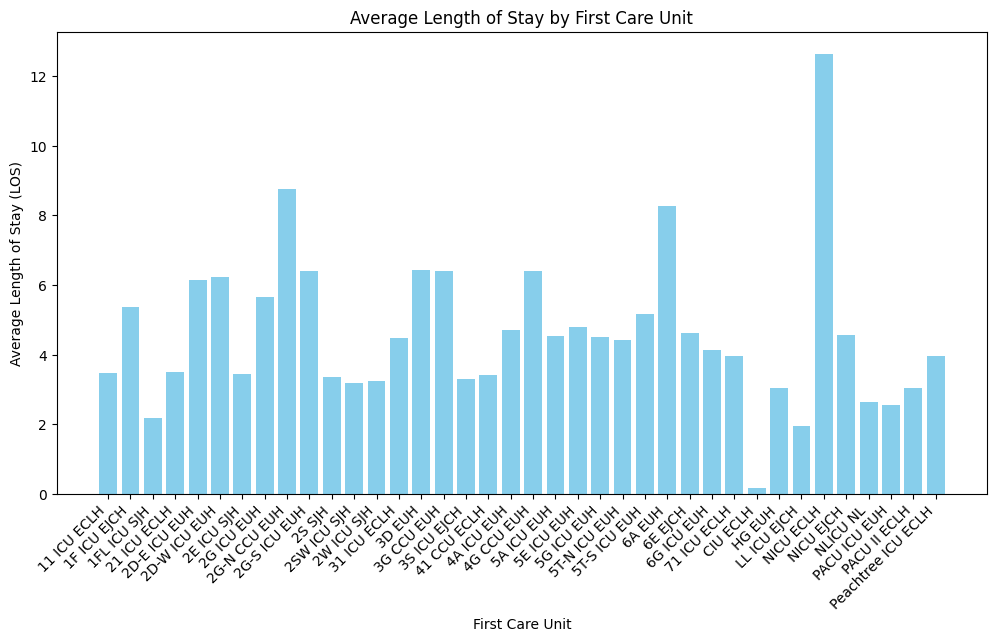

In [36]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(average_los.index, average_los.values, color='skyblue')

# Adding title and labels
plt.title('Average Length of Stay by First Care Unit')
plt.xlabel('First Care Unit')
plt.ylabel('Average Length of Stay (LOS)')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

So we see that NICU EJCH care unit has the highest average ICU length of stays. But the bars don't have the information of average los values in them. Can we print that out in the visualizations?

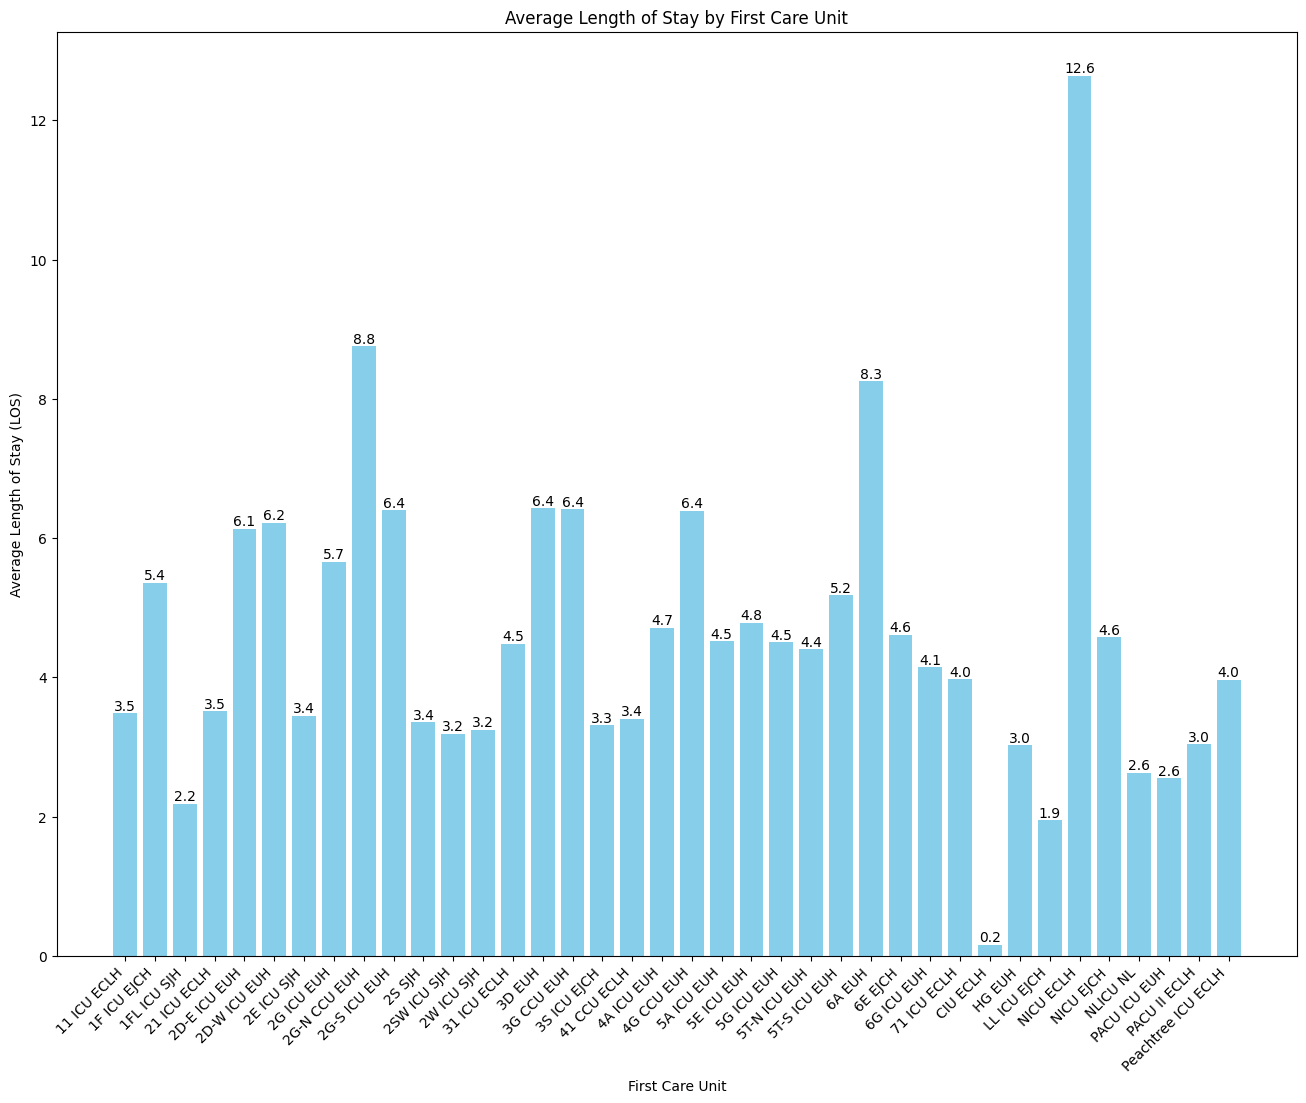

In [37]:
# Plotting the bar chart
plt.figure(figsize=(16, 12))  # Optional: to make the chart larger
bars = plt.bar(average_los.index, average_los.values, color='skyblue')

# Adding title and labels
plt.title('Average Length of Stay by First Care Unit')
plt.xlabel('First Care Unit')
plt.ylabel('Average Length of Stay (LOS)')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Adding the average los values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

# Display the chart
plt.show()

## Merging ICD diagnoses code and the title

We will merge different data from the different parquet files using dictionary approach. 

This approach to merging data from multiple tables involves using one or more columns from a DataFrame (or table) as keys in a dictionary. The values in the dictionary correspond to the data you want to merge or map. This approach is often used when you want to map or replace values in one DataFrame based on values from another DataFrame.

### Suppose we have two DataFrames:

#### df_codes with columns icd_code and long_title.
#### df_patients with columns patient_id and icd_code.

In [38]:
#For example if the dataframes are like this-

df_codes = pd.DataFrame({
    'icd_code': ['A01', 'B02', 'C03', 'D04'],
    'long_title': ['Typhoid fever', 'Varicella infection', 'Malignant neoplasm of liver', 'Diabetes mellitus']
})

# Creating the second DataFrame (df_patients)
df_patients = pd.DataFrame({
    'patient_id': [101, 102, 103, 104],
    'icd_code': ['A01', 'B02', 'C03', 'A01']
})

display(df_codes)
display(df_patients)

,icd_code,long_title
0,A01,Typhoid fever
1,B02,Varicella infection
2,C03,Malignant neoplasm of liver
3,D04,Diabetes mellitus


,patient_id,icd_code
0,101,A01
1,102,B02
2,103,C03
3,104,A01


We want to add the long_title from df_codes to df_patients based on icd_code.

In [39]:
# Create a mapping dictionary from df_codes
mapping_dict = df_codes.set_index('icd_code')['long_title'].to_dict()

# Map the long_title to df_patients based on icd_code
df_patients['long_title'] = df_patients['icd_code'].map(mapping_dict)

# Check the df_patients table
df_patients

,patient_id,icd_code,long_title
0,101,A01,Typhoid fever
1,102,B02,Varicella infection
2,103,C03,Malignant neoplasm of liver
3,104,A01,Typhoid fever


## Now let's try to do it in the original parquet files

In [40]:
df_1 = pd.read_parquet('../../fsx/embed/emory-mimic-icu/tables/d_icd_diagnoses.parquet')
df_1

,icd_code,icd_version,long_title
0,205.00,9,Not Recorded
1,288.60,9,Not Recorded
2,284.1,9,Not Recorded
3,V58.11,9,Not Recorded
4,793.1,9,Not Recorded
...,...,...,...
43348,S72.112P,10,Displaced fracture of greater trochanter of le...
43349,S67.193S,10,"Crushing injury of left middle finger, sequela"
43350,V47.01XA,10,Driver of sport utility vehicle injured in col...
43351,S36.531D,10,"Laceration of transverse colon, subsequent enc..."


In [41]:
df_2 = pd.read_parquet('../../fsx/embed/emory-mimic-icu/tables/diagnoses_icd.parquet')
df_2

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,42553830,35447053039,1,205.00,9
1,42553830,35447053039,2,288.60,9
2,42553830,35447053039,2,284.1,9
3,42553830,88425812851,1,V58.11,9
4,42553830,88425812851,1,793.1,9
...,...,...,...,...,...
59993809,54723341,2673708061,2,E11.22,10
59993810,54723341,2673708061,2,M54.30,10
59993811,77108580,82711831706,2,Z85.01,10
59993812,41848738,55194094356,2,D64.9,10


In [42]:
# Step 1: Create a dictionary with (icd_code, icd_version) as the key and long_title as the value
dict_1 = pd.Series(df_1.long_title.values,index = df_1.icd_code).to_dict()

In [43]:
# Step 2: Create a new column in df2 that maps the long_title using the dictionary
df_2['long_title'] = df_2['icd_code'].map(dict_1)

In [44]:
df_2

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title
0,42553830,35447053039,1,205.00,9,Not Recorded
1,42553830,35447053039,2,288.60,9,Not Recorded
2,42553830,35447053039,2,284.1,9,Not Recorded
3,42553830,88425812851,1,V58.11,9,Not Recorded
4,42553830,88425812851,1,793.1,9,Not Recorded
...,...,...,...,...,...,...
59993809,54723341,2673708061,2,E11.22,10,Type 2 diabetes mellitus with diabetic chronic...
59993810,54723341,2673708061,2,M54.30,10,"Sciatica, unspecified side"
59993811,77108580,82711831706,2,Z85.01,10,Personal history of malignant neoplasm of esop...
59993812,41848738,55194094356,2,D64.9,10,"Anemia, unspecified"


## Adding more columns from different tables

Making a similar column for both ICD diagnoses table and admission table using SubjectID and AdmissionID

In [45]:
df_2["subject_id_hadm_id"]=df_2["subject_id"].astype(str)+'_'+df_2['hadm_id'].astype(str)
df_2=df_2[["subject_id_hadm_id","long_title", "icd_code"]]
df_2

,subject_id_hadm_id,long_title,icd_code
0,42553830_35447053039,Not Recorded,205.00
1,42553830_35447053039,Not Recorded,288.60
2,42553830_35447053039,Not Recorded,284.1
3,42553830_88425812851,Not Recorded,V58.11
4,42553830_88425812851,Not Recorded,793.1
...,...,...,...
59993809,54723341_2673708061,Type 2 diabetes mellitus with diabetic chronic...,E11.22
59993810,54723341_2673708061,"Sciatica, unspecified side",M54.30
59993811,77108580_82711831706,Personal history of malignant neoplasm of esop...,Z85.01
59993812,41848738_55194094356,"Anemia, unspecified",D64.9


In [46]:
df_admissions = pd.read_parquet('../../fsx/embed/emory-mimic-icu/tables/admissions.parquet')
df_admissions["subject_id_hadm_id"]=df_admissions["subject_id"].astype(str)+'_'+df_admissions['hadm_id'].astype(str)
df_admissions

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,subject_id_hadm_id
0,10000100,58594204243,2019-06-26 13:20:00,2019-07-05 12:47:00,NaT,None,None,PHYSIC OFC/CLINIC,HOME SELF CARE,MEDICARE A,None,None,African American or Black,NaT,NaT,0,10000100_58594204243
1,10000562,60707883031,2016-06-02 09:24:00,2016-06-04 15:11:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MEDICAID,None,None,African American or Black,NaT,NaT,0,10000562_60707883031
2,10000671,67252991505,2019-05-14 20:20:00,2019-05-15 13:09:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,SELF PAY,None,None,African American or Black,NaT,NaT,0,10000671_67252991505
3,10000683,29770490036,2015-05-12 18:28:00,2015-05-17 15:55:00,NaT,None,None,TRANSFER FROM HOSP,HOME SELF CARE,MANAGED CARE,None,None,Caucasian or White,NaT,NaT,0,10000683_29770490036
4,10000683,21514546148,2015-05-28 14:04:00,2015-06-03 19:03:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,None,None,Caucasian or White,NaT,NaT,0,10000683_21514546148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972842,99999731,37382428249,2009-11-24 12:50:00,2009-11-25 18:50:00,NaT,None,None,Not Recorded,HOME SELF CARE,MANAGED CARE,None,None,African American or Black,NaT,NaT,0,99999731_37382428249
972843,99999731,58311570862,2010-06-28 15:23:00,2010-06-29 19:42:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,None,None,African American or Black,NaT,NaT,0,99999731_58311570862
972844,99999731,55258667078,2010-11-20 13:01:00,2010-11-21 18:45:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,None,None,African American or Black,NaT,NaT,0,99999731_55258667078
972845,99999856,39743800534,2019-09-21 08:20:00,2019-09-23 15:45:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE,None,None,Caucasian or White,NaT,NaT,0,99999856_39743800534


## Adding the long title and icd code from ICD diagnoses table to Admissions table

In [47]:
dict_1 = pd.Series(df_2.long_title.values,index = df_2.subject_id_hadm_id).to_dict()
dict_2 = pd.Series(df_2.icd_code.values,index = df_2.subject_id_hadm_id).to_dict()

In [48]:
df_admissions['long_title'] = df_admissions['subject_id_hadm_id'].map(dict_1)
df_admissions['icd_code'] = df_admissions['subject_id_hadm_id'].map(dict_2)

df_admissions

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,subject_id_hadm_id,long_title,icd_code
0,10000100,58594204243,2019-06-26 13:20:00,2019-07-05 12:47:00,NaT,None,None,PHYSIC OFC/CLINIC,HOME SELF CARE,MEDICARE A,None,None,African American or Black,NaT,NaT,0,10000100_58594204243,Abscess of liver,K75.0
1,10000562,60707883031,2016-06-02 09:24:00,2016-06-04 15:11:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MEDICAID,None,None,African American or Black,NaT,NaT,0,10000562_60707883031,Long term (current) use of insulin,Z79.4
2,10000671,67252991505,2019-05-14 20:20:00,2019-05-15 13:09:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,SELF PAY,None,None,African American or Black,NaT,NaT,0,10000671_67252991505,Epigastric pain,R10.13
3,10000683,29770490036,2015-05-12 18:28:00,2015-05-17 15:55:00,NaT,None,None,TRANSFER FROM HOSP,HOME SELF CARE,MANAGED CARE,None,None,Caucasian or White,NaT,NaT,0,10000683_29770490036,Not Recorded,272.4
4,10000683,21514546148,2015-05-28 14:04:00,2015-06-03 19:03:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,None,None,Caucasian or White,NaT,NaT,0,10000683_21514546148,Not Recorded,305.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972842,99999731,37382428249,2009-11-24 12:50:00,2009-11-25 18:50:00,NaT,None,None,Not Recorded,HOME SELF CARE,MANAGED CARE,None,None,African American or Black,NaT,NaT,0,99999731_37382428249,Not Recorded,585.9
972843,99999731,58311570862,2010-06-28 15:23:00,2010-06-29 19:42:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,None,None,African American or Black,NaT,NaT,0,99999731_58311570862,Not Recorded,255.42
972844,99999731,55258667078,2010-11-20 13:01:00,2010-11-21 18:45:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,None,None,African American or Black,NaT,NaT,0,99999731_55258667078,Not Recorded,276.51
972845,99999856,39743800534,2019-09-21 08:20:00,2019-09-23 15:45:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE,None,None,Caucasian or White,NaT,NaT,0,99999856_39743800534,Unspecified atrial fibrillation,I48.91


## Doing the same for ICU Stays table

In [49]:
df_icustays["subject_id_hadm_id"]=df_icustays["subject_id"].astype(str)+'_'+df_icustays['hadm_id'].astype(str)

In [50]:
df_icustays

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,subject_id_hadm_id
0,10000683,29770490036,1,5E ICU EUH,5E ICU EUH,2015-05-12 18:29:30,2015-05-13 16:51:55,0.932234,10000683_29770490036
1,10000683,29770490036,2,5E ICU EUH,5E ICU EUH,2015-05-13 17:16:17,2015-05-13 22:14:51,0.207338,10000683_29770490036
2,10000683,87659254514,3,5E ICU EUH,5E ICU EUH,2015-09-08 12:10:12,2015-09-09 14:28:37,1.096123,10000683_87659254514
3,10000788,54733468003,4,2SW ICU SJH,2SW ICU SJH,2017-02-01 14:17:11,2017-02-12 10:27:44,10.840660,10000788_54733468003
4,10001527,90885934252,5,5E ICU EUH,5E ICU EUH,2012-09-27 21:45:17,2012-09-28 15:00:27,0.718866,10001527_90885934252
...,...,...,...,...,...,...,...,...,...
189220,99995283,41747642827,189221,41 CCU ECLH,41 CCU ECLH,2015-05-17 07:53:44,2015-05-18 15:39:21,1.323345,99995283_41747642827
189221,99995283,76374197374,189222,41 CCU ECLH,41 CCU ECLH,2018-04-08 20:56:03,2018-04-09 17:58:46,0.876887,99995283_76374197374
189222,99995283,98208879646,189223,PACU II ECLH,21 ICU ECLH,2010-12-28 06:16:21,2010-12-29 12:13:20,1.247905,99995283_98208879646
189223,99997196,59639511443,189224,2SW ICU SJH,2SW ICU SJH,2017-09-23 12:38:48,2017-09-24 15:21:54,1.113264,99997196_59639511443


In [51]:
dict_3 = pd.Series(df_icustays.first_careunit.values,index = df_icustays.subject_id_hadm_id).to_dict()
dict_4 = pd.Series(df_icustays.last_careunit.values,index = df_icustays.subject_id_hadm_id).to_dict()
dict_5 = pd.Series(df_icustays.los.values,index = df_icustays.subject_id_hadm_id).to_dict()

In [52]:
df_admissions['first_careunit'] = df_admissions['subject_id_hadm_id'].map(dict_3)
df_admissions['last_careunit'] = df_admissions['subject_id_hadm_id'].map(dict_4)
df_admissions['los'] = df_admissions['subject_id_hadm_id'].map(dict_5)

df_admissions

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,race,edregtime,edouttime,hospital_expire_flag,subject_id_hadm_id,long_title,icd_code,first_careunit,last_careunit,los
0,10000100,58594204243,2019-06-26 13:20:00,2019-07-05 12:47:00,NaT,None,None,PHYSIC OFC/CLINIC,HOME SELF CARE,MEDICARE A,...,African American or Black,NaT,NaT,0,10000100_58594204243,Abscess of liver,K75.0,NaN,NaN,NaN
1,10000562,60707883031,2016-06-02 09:24:00,2016-06-04 15:11:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MEDICAID,...,African American or Black,NaT,NaT,0,10000562_60707883031,Long term (current) use of insulin,Z79.4,NaN,NaN,NaN
2,10000671,67252991505,2019-05-14 20:20:00,2019-05-15 13:09:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,SELF PAY,...,African American or Black,NaT,NaT,0,10000671_67252991505,Epigastric pain,R10.13,NaN,NaN,NaN
3,10000683,29770490036,2015-05-12 18:28:00,2015-05-17 15:55:00,NaT,None,None,TRANSFER FROM HOSP,HOME SELF CARE,MANAGED CARE,...,Caucasian or White,NaT,NaT,0,10000683_29770490036,Not Recorded,272.4,5E ICU EUH,5E ICU EUH,0.207338
4,10000683,21514546148,2015-05-28 14:04:00,2015-06-03 19:03:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,...,Caucasian or White,NaT,NaT,0,10000683_21514546148,Not Recorded,305.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972842,99999731,37382428249,2009-11-24 12:50:00,2009-11-25 18:50:00,NaT,None,None,Not Recorded,HOME SELF CARE,MANAGED CARE,...,African American or Black,NaT,NaT,0,99999731_37382428249,Not Recorded,585.9,NaN,NaN,NaN
972843,99999731,58311570862,2010-06-28 15:23:00,2010-06-29 19:42:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,...,African American or Black,NaT,NaT,0,99999731_58311570862,Not Recorded,255.42,NaN,NaN,NaN
972844,99999731,55258667078,2010-11-20 13:01:00,2010-11-21 18:45:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,...,African American or Black,NaT,NaT,0,99999731_55258667078,Not Recorded,276.51,NaN,NaN,NaN
972845,99999856,39743800534,2019-09-21 08:20:00,2019-09-23 15:45:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE,...,Caucasian or White,NaT,NaT,0,99999856_39743800534,Unspecified atrial fibrillation,I48.91,NaN,NaN,NaN


### Now we have a merged dataframe which we can use to run further analysis.

In [53]:
df_admissions.to_csv("df_admissions.csv")